In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
N = 2000
data_centers = [[1.5, 6], [-1, -6], [-1.5, 6]]
data1 = np.random.randn(N // 3, 2) + np.array(data_centers[0])
data2 = np.random.randn(N // 3, 2) + np.array(data_centers[1])
data3 = np.random.randn(N // 3, 2) + np.array(data_centers[2])
data = np.concatenate((data1, data2, data3))

df = pd.DataFrame.from_records(data, columns=['X', 'Y'])


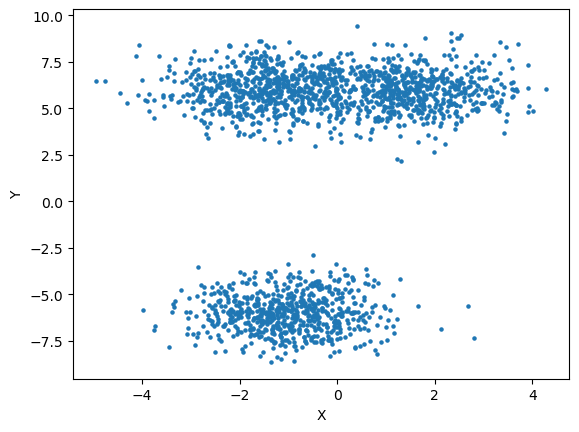

In [4]:

df.plot(x='X', y='Y',
		kind='scatter',
		s=5)
plt.show()

In [5]:
def euclidean(point, dpt):
	"""
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
	return np.sqrt(np.sum((point - dpt) ** 2, axis=1))


In [6]:
class KMeans:
	def __init__(self, n_clusters=8, max_iter=300):
		self.centroids = None
		self.n_clusters = n_clusters
		self.max_iter = max_iter
		self.centroids_history = []

	def fit(self, X_train):
		# Randomly select centroid start points, uniformly distributed across the domain of the dataset
		min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
		self.centroids = [np.random.uniform(min_, max_) for _ in range(self.n_clusters)]
		# Iterate, adjusting centroids until converged or until passed max_iter
		iteration = 0
		prev_centroids = None
		while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
			# Sort each datapoint, assigning to nearest centroid
			sorted_points = [[] for _ in range(self.n_clusters)]
			for x in X_train:
				dists = euclidean(x, self.centroids)
				centroid_idx = np.argmin(dists)
				sorted_points[centroid_idx].append(x)
			# Push current centroids to previous, reassign centroids as mean of the points belonging to them
			self.centroids_history.append(self.centroids)
			prev_centroids = self.centroids
			self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
			for i, centroid in enumerate(self.centroids):
				if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
					self.centroids[i] = prev_centroids[i]
			iteration += 1


In [7]:
kmeans = KMeans(3)
kmeans.fit(df[['X', 'Y']].values)


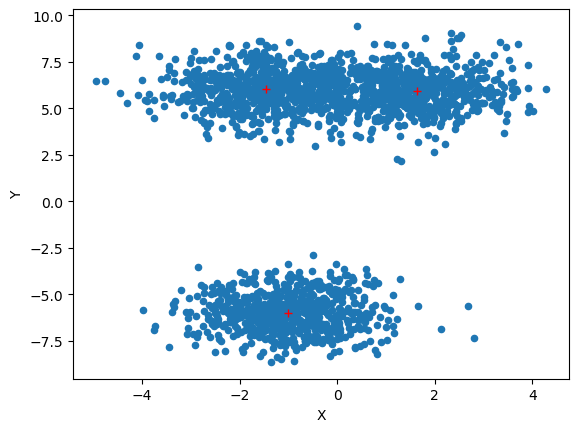

In [8]:
centroids = kmeans.centroids
df.plot(x='X', y='Y',
		kind='scatter',)
plt.plot([x for x, _ in centroids],
		 [y for _, y in centroids],
		 'r+')
plt.show()


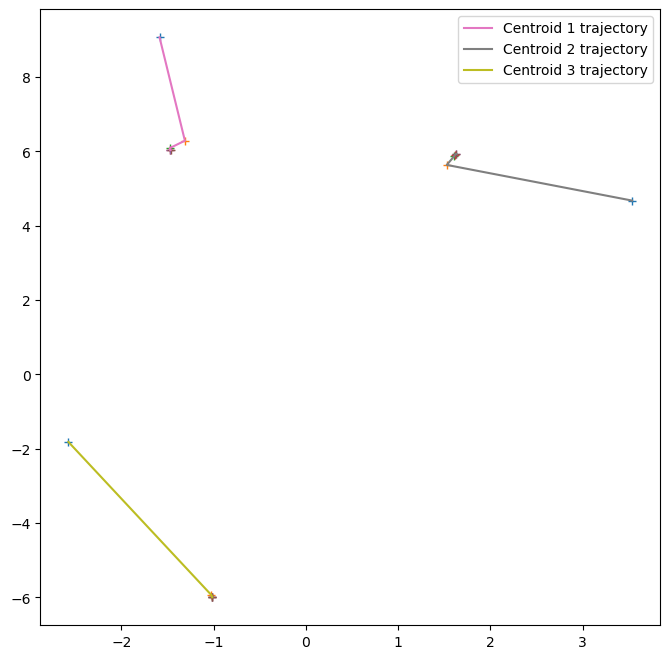

In [9]:
plt.figure(figsize=(8, 8))
centroid_history = kmeans.centroids_history
c1_hist = []
c2_hist = []
c3_hist = []
for step, c in enumerate(centroid_history):
  c1, c2, c3 = c
  c1_hist.append(c1)
  c2_hist.append(c2)
  c3_hist.append(c3)
  plt.plot([x for x,_ in c],
           [y for _, y in c],
           '+')
c1_hist = np.asarray(c1_hist)
c2_hist = np.asarray(c2_hist)
c3_hist = np.asarray(c3_hist)
plt.plot(c1_hist[:, 0], c1_hist[:, 1], label='Centroid 1 trajectory')
plt.plot(c2_hist[:, 0], c2_hist[:, 1], label='Centroid 2 trajectory')
plt.plot(c3_hist[:, 0], c3_hist[:, 1], label='Centroid 3 trajectory')
plt.legend()
plt.show()

In [ ]:
print(f"Actual centroids: {'|'.join([f'({x},{y})' for x, y in data_centers])}")
print(f"Predicted centroids: {'|'.join([f'({np.around(x, 2)},{np.around(y, 2)})' for x, y in centroids])}")

Actual centroids: 1.5,6|-1,-6|-1.5,6
Predicted centroids: -1.0,-5.99|1.54,5.99|-1.52,6.03
